In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class KMeans:
    def __init__(self,k=5,max_iters=100,plot_steps=True):
        self.k = k
        self.max_iters = max_iters
        
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = []
        self.plot_steps = plot_steps
        
    def predict(self,X):
        self.X = X
        self.n_samples,self.n_features = X.shape
        
        #assign random cluster index
        random_idxs = np.random.choice(self.n_samples,self.k,replace=False)
        
        self.centroids = [self.X[i] for i in random_idxs]
        
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
            
            centroids_old = self.centroids
            
            self.centroids = self._get_centroids(self.clusters)
            
            if self._is_converged(centroids_old,self.centroids):
                break
        
        return self._create_cluster_labels(self.clusters)
            
    def _create_clusters(self,centroids):
        clusters = [[] for _ in range(self.k)]
        for idx,sample in enumerate(self.X):
            centroid_idx = self._get_nearest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        
        return clusters
    
    def _get_nearest_centroid(self,x,centroids):
        
        distances = [self._euclidean_dist(x,c) for c in centroids]
        return np.argmin(distances)
        
    def _euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.k,self.n_features))
        for idx,cluster in enumerate(clusters):
            centroids[idx] = (np.mean(self.X[cluster],axis=0))
        
        return centroids
    
    def _is_converged(self,c_old,c_new):
        distances = [self._euclidean_dist(c_old[i],c_new[i]) for i in range(len(c_old))]
        return sum(distances) == 0
    
    def _create_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        
        for idx,cluster in enumerate(clusters):
            for sample_id in cluster:
                labels[sample_id] = idx
        
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()
    

(500, 2)
3


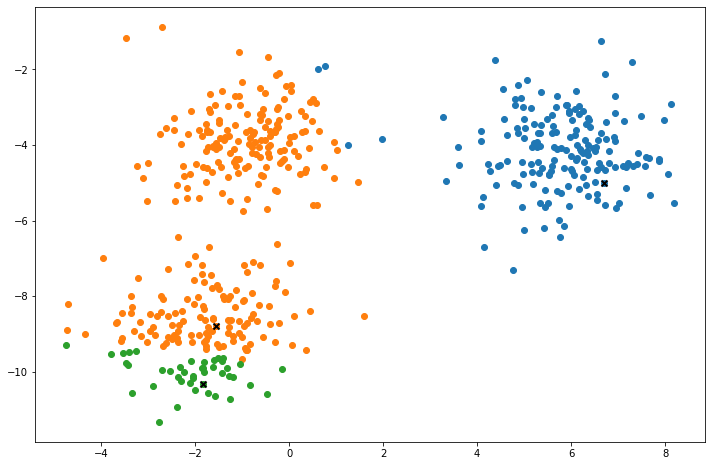

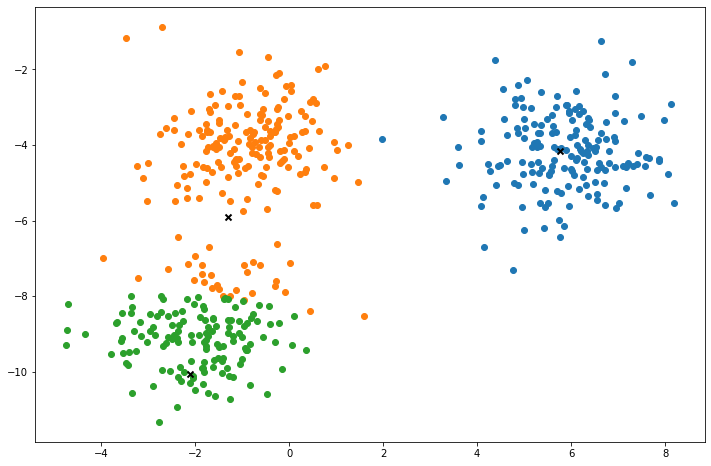

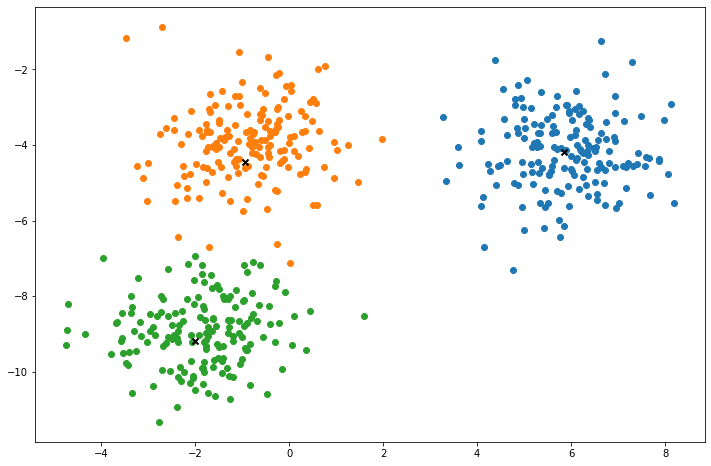

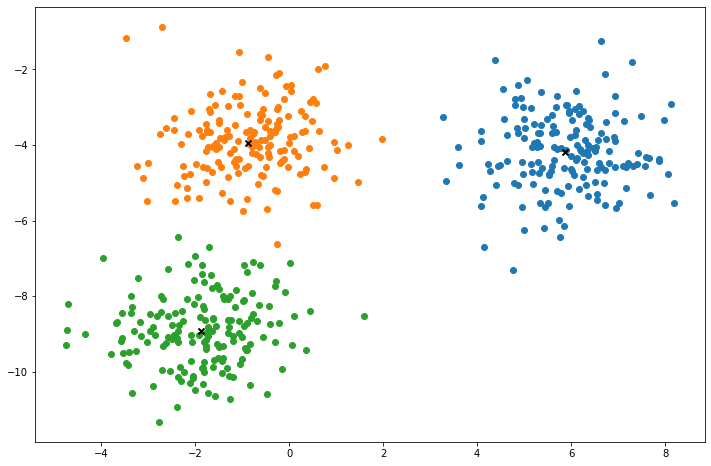

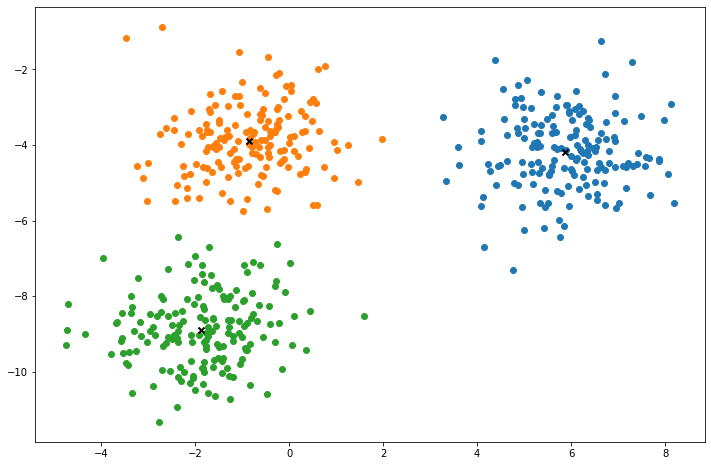

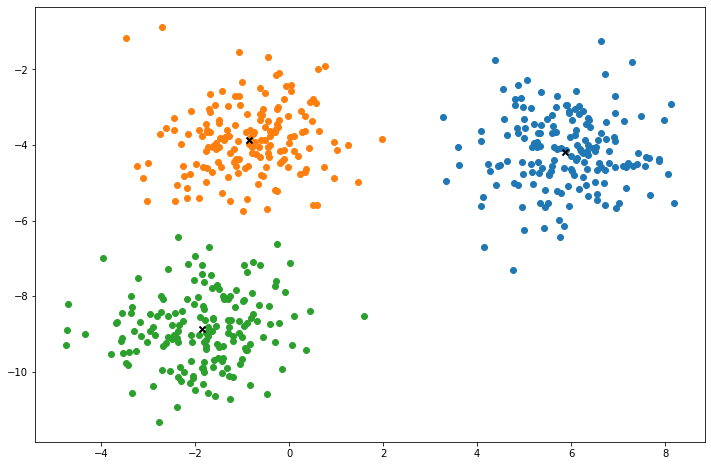

In [29]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(clusters,150, plot_steps=True)
y_pred = k.predict(X)